In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import BSpline

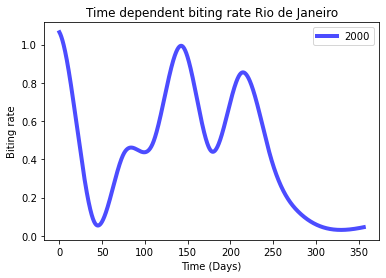

In [838]:
# SPLINE PYTHON TEST
psis_knots=[(((i+1)-1)/(7))*356 for i in range (0,7+1)] # knots in array 6, 0-356
d=3 #bspline degree

y2000=[0.02588398, 0.95980485, 0.06997692,0.42970116,0.48578761,0.99226002,0.44257916,0.84893123, 0.42613096,0.12228343,0.03766206,0.03926239]

x2000=np.linspace(0,376,12)
tck2000 = interpolate.splrep(x2000, y2000, s=0, k=3) 
spl2000 = BSpline(tck2000[0], tck2000[1], tck2000[2])
#spl1 = BSpline(psis_knots, c, d)
#spl1 = BSpline(psi, c, d)
xx=  np.linspace(0, 376, 376*376 + 1)#np.linspace(0, 365, 50)


#2001
y2001=[0.34,0.73,0.1,0.1,0.09,0.08]
x2001=np.linspace(0,358,6)
tck2001 = interpolate.splrep(x2001, y2001, s=0, k=3) 
spl2001 = BSpline(tck2001[0], tck2001[1], tck2001[2])
#spl1 = BSpline(psis_knots, c, d)
#spl1 = BSpline(psi, c, d)
xx=  np.linspace(0, 356, 356*356 + 1)#np.linspace(0, 365, 50)

#2002

y2002=[0.01,0.57,0.2,0.195,0.192,0.19]
x2002=np.linspace(0,358,6)
tck2002 = interpolate.splrep(x2002, y2002, s=0, k=3) 
spl2002 = BSpline(tck2002[0], tck2002[1], tck2002[2])

#2003
y2003=[0.19,0.58,0.17,0.03]
x2003=np.linspace(0,358,4)
tck2003 = interpolate.splrep(x2003, y2003, s=0, k=3)
spl2003 = BSpline(tck2003[0], tck2003[1], tck2003[2])

# c= [0.799, 0.699,0.487,0.241]
# spl_2000=BSpline(psis_knots, c, 3)


plt.plot(xx, spl2000(xx+27.2958714), 'b-', lw=4, alpha=0.7, label='2000')
#plt.plot(xx, spl2001(xx), 'r-', lw=4, alpha=0.7, label='2001')
#plt.plot(xx, spl2002(xx), 'g-', lw=4, alpha=0.7, label='2002')
#plt.plot(xx, spl2003(xx), 'm-', lw=4, alpha=0.7, label='2003')
plt.xlabel('Time (Days)')
plt.ylabel('Biting rate')
plt.title("Time dependent biting rate Rio de Janeiro")
plt.legend()
#tck2002
#spl2002(358)
#plt.savefig('/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/Fits_Spline_Temperature/Municipality Fits/Rio/2000')
#plt.savefig('/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/Fits_Spline_Temperature/Manaus/Manaus_splines.jpg')

In [ ]:
temperature data

In [ ]:
# 

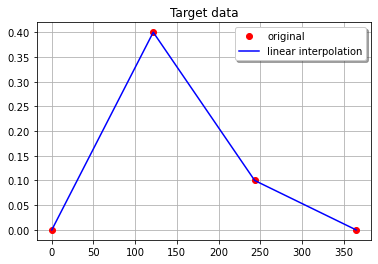

In [258]:
y = [0,0.4,0.1,0]
n = len(y)
x = np.linspace(0, 365, 4) 
plt.plot(x, y, 'ro', label="original")
plt.plot(x, y, 'b', label="linear interpolation")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

In [267]:
tck = interpolate.splrep(x, y, s=0, k=3) 
x_new = np.linspace(min(x), max(x), 100)
y_fit = interpolate.BSpline(*tck)(x_new)
tck[1]

array([-0.00766667,  2.25638889, -0.90255556,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

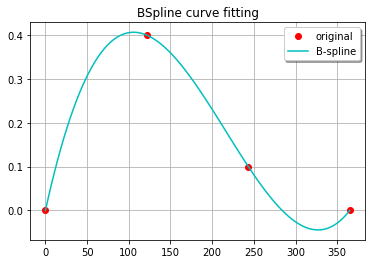

In [260]:
plt.title("BSpline curve fitting")
plt.plot(x, y, 'ro', label="original")
plt.plot(x_new, y_fit, '-c', label="B-spline")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [843]:
# Computing Weekly Incidence from ODE model
model_df=pd.read_csv("/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/human_epi_model_original/Epi_SEIR/human_model_output/dengue_model_output.csv", sep=",")
#model_df=pd.read_csv("/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/Fits_Spline_Temperature/Manaus/2000/2000_output.csv", sep=",")

time=list(model_df['Time'][::7])
model_df['Dh'] = model_df['Cummulative Infected Humans'].diff()
#model_df['Dh'] = model_df['Infected Humans'].diff()
out = model_df.groupby(model_df.index // 7).sum()['Dh']
#out= week_agg['Dh']
incidence_model = pd.DataFrame({'Time':time, 'Dh':out})
len(time)

54

In [854]:
# Getting Incidence Data that we are fitting to
data= pd.read_csv("fit_data/old/incidence_2000.csv")
temperature=pd.read_csv('/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/Fits_Spline_Temperature/Municipality Fits/Rio/2000/temperature_2000.csv',sep=',')
temperature=temperature.reset_index()
temperature

,index,CD_MUN,NM_MUN,SIGLA,AREA_KM2,time,t2m,t2m_min,t2m_max
0,0,3304557,Rio de Janeiro,RJ,1200.329,8/18/00,19.33350,17.05697,21.75482
1,1,3304557,Rio de Janeiro,RJ,1200.329,8/19/00,18.66915,16.33495,21.08096
2,2,3304557,Rio de Janeiro,RJ,1200.329,8/20/00,19.96600,16.29043,24.26260
3,3,3304557,Rio de Janeiro,RJ,1200.329,8/21/00,20.37127,15.42523,25.73790
4,4,3304557,Rio de Janeiro,RJ,1200.329,8/22/00,21.74676,16.56118,27.64400
...,...,...,...,...,...,...,...,...,...
380,380,3304557,Rio de Janeiro,RJ,1200.329,9/2/01,23.84304,18.83330,28.42160
381,381,3304557,Rio de Janeiro,RJ,1200.329,9/3/01,23.76806,18.83828,28.52883
382,382,3304557,Rio de Janeiro,RJ,1200.329,9/4/01,23.85700,19.56396,28.83553
383,383,3304557,Rio de Janeiro,RJ,1200.329,9/5/01,22.17574,20.04025,24.85436


Text(0.5, 1.0, 'Incidence Rio 2000')

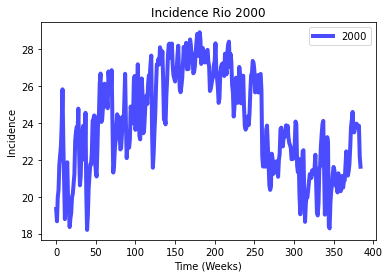

In [855]:
#plt.plot(incidence_model['Time'], data['Dh'], 'ro', label='Dh data')
#plt.plot(incidence_model['Time'], incidence_model['Dh'], 'b-', label= 'Dh fit')
plt.plot(temperature['index'], temperature['t2m'], 'b-', lw=4, alpha=0.7, label='2000')
plt.xlabel('Time (Weeks)')
plt.ylabel('Incidence')
plt.legend()
plt.title("Incidence Rio 2000")
#plt.savefig('/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/Fits_Spline_Temperature/Municipality Fits/Rio/2000/incidence_rio_2000.png')

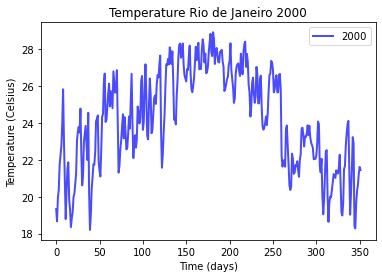

In [865]:
plt.plot(temperature['index'].loc[0:351],temperature['t2m'].loc[0:351], 'b-', lw=2,alpha=0.7, label='2000')
plt.xlabel('Time (days)')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.title("Temperature Rio de Janeiro 2000")
plt.savefig('/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/Fits_Spline_Temperature/Municipality Fits/Rio/2000/temperature_rio_2000.png')

In [70]:

#OLD IMPLEMENTATION TEST

psis_knots=[(((i+1)-1)/(5))*356 for i in range (0,5+1)]

# RIO 2000
#beta1= 0.01
#beta2= 0.005
#beta3= -0.005
#intercept=50

# beta1: 0.05
# beta2: 0.006
# beta3: -0.006
# intercept: 20

# RIO 2005
# beta1= 0.001
# beta2= 0.0015
# beta3= 0.0034
# intercept=0

# RIO 2001
beta1= 0.001 #0.001
beta2= 0.002 #0.0019
beta3= 0.003 #0.0034
beta4= 0.004
beta5=0.005

intercept= 150

psis_knots

[0.0, 71.2, 142.4, 213.6, 284.8, 356.0]

In [71]:
def Spline_1storder(index, t):
    if index+1==1:
        return 1
    elif t<psis_knots[index-1]:
        return 0
    elif psis_knots[index-1]<=t and t<psis_knots[index]:
        return t-psis_knots[index-1]
    elif psis_knots[index] <=t:
        return psis_knots[index]-psis_knots[index-1]
        
        
def Spline_2ndorder(index, t):
    if index+1==1:
        return 1
    elif index+1==2:
        return t
    elif t<psis_knots[index]:
        return 0
    elif psis_knots[index]<=t and t<psis_knots[index+1]:
        return (t-psis_knots[index-2])**2
    elif psis_knots[index+1] <=t:
        return 2*(psis_knots[index-1]-psis_knots[index-2])*(t-psis_knots[index-1])+(psis_knots[index-1]-psis_knots[index-2])**2
                  
    
    
def Splines_piecewise(t):
    sp=0;
        #-----------------------------------------
        # Spline first order
        #self.sp=self.params['beta1']*self.Spline_1storder(0,t)+self.params['beta2']*self.Spline_1storder(1,t)+\
        #self.params['beta3']*self.Spline_1storder(2,t)
        #-------------------------------------------
        # Spline second order
    sp=beta1*Spline_2ndorder(0,t+intercept)+beta2*Spline_2ndorder(1,t+intercept)+\
    beta3*Spline_2ndorder(2,t+intercept)+beta4*Spline_2ndorder(3, t+intercept)+\
    beta5*Spline_2ndorder(4, t+intercept)
        #----------------------------------------------
    return sp
#   

In [72]:
t_eval = np.linspace(0, 357, 357*357 + 1)
biting_rate = []
for j in t_eval:
    b=Splines_piecewise(j)
    biting_rate.append(b)


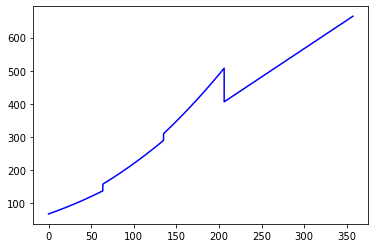

In [73]:
plt.plot(t_eval, biting_rate, 'b-')
#plt.savefig('/Users/dflorez/Documents/Project/DENGUE/OLD_CODE/Go-back/Fits_Spline_Temperature/Rio/First-order-2001/Spline2001_fit.jpg')